In [1]:
import zipfile
import os
import sys

import cv2
import numpy as np
import mxnet as mx
from mxnet import nd
from mxnet.gluon import nn
from mxnet.gluon.model_zoo import vision as models

sys.path.append('E:/xinlib')
from xcv import TrainerImage, NameIter
#from base.file import split_names
#from base.filename import FileName, nameBunch

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\externals\joblib\func_inspect.py:53: DeprecationWarning: invalid escape sequence \<
  '\<doctest (.*\.rst)\[(.*)\]\>', source_file).groups()
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\externals\joblib\_memory_helpers.py:10: DeprecationWarning: invalid escape sequence \s
  cookie_re = re.compile("coding[:=]\s*([-\w.]+)")
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:349: DeprecationWarning: invalid escape sequence \k
  """
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\cluster\supervised.py:578: DeprecationWarning: invalid escape sequence \s
  """


各个类下的样本大小：


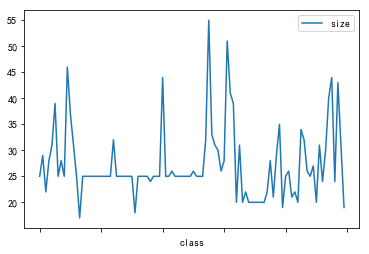

类别数： 100


In [2]:
root  = 'E:/Data/Badidu/'
root1 = root + os.listdir(root)[0]
T = TrainerImage(root1, prob = .2, resize = 224)
n_class = T.n_class
batch_size = 9
ctx = mx.gpu(0)
print('类别数：', n_class)

In [3]:
train_set, val_set = T.ZF.split_set(T.trainset, prob=.2)

In [4]:
class BRR(nn.HybridBlock):
    def __init__(self, features, **kwargs):
        super().__init__(**kwargs)
        self.features = features
        with self.features.name_scope():
            self.output = nn.HybridSequential()
            self.output.add(
                nn.Dense(1000),
                nn.Activation('relu'),
                #nn.Dropout(0.5),
                nn.Dense(500),
                nn.Activation('relu'),
                nn.Dense(n_class)
            )
            
    def hybrid_forward(self, F, x):
        x = self.features(x)
        x = self.output(x)
        return x
    
net = models.densenet201(pretrained=True, ctx=ctx)
finetune_net = BRR(net.features)
finetune_net.output.initialize(mx.init.MSRAPrelu(), ctx =ctx)
finetune_net.hybridize()

In [ ]:
T.train((1, 2), ctx, finetune_net, 1000, batch_size)

INFO:mxboard.event_file_writer:successfully opened events file: D:/logs//cross_entropy/brr0\events.out.tfevents.1528631268.Xinet
INFO:mxboard.event_file_writer:wrote 1 event to disk
INFO:mxboard.event_file_writer:wrote 1 event to disk
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\PIL\GifImagePlugin.py:783: DeprecationWarning: invalid escape sequence \*
  """
INFO:mxboard.event_file_writer:successfully opened events file: D:/logs/events.out.tfevents.1528631269.Xinet
INFO:mxboard.event_file_writer:wrote 1 event to disk
INFO:mxboard.event_file_writer:wrote 1 event to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mx

[Epoch 0 Batch 200] Training: accuracy=0.012714


INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writer:wrote 3 events to disk
INFO:mxboard.event_file_writ